# Process Bench Data
This notebook processes the bench location CSV data into a JSON format optimized for our visualization.

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from shapely.geometry import Point, shape, mapping
from shapely.wkt import loads

In [20]:
# File paths
bench_file = 'City_Bench_Locations__Historical__20250303.csv'
seats_file = 'Seating_Locations_20250304.csv'
plaza_file = 'NYC_DOT_Pedestrian_Plazas_20250304.csv'
parks_file = 'Parks_Properties_20241031.csv'

bid_file = '../NYC_BIDS_09112015.csv'

json_output = 'bench_data.json'

In [21]:
bench_data = gpd.read_file(bench_file)
bench_data['the_geom'] = gpd.GeoSeries.from_wkt(bench_data['the_geom'])
bench_data = gpd.GeoDataFrame(bench_data, geometry='the_geom')

bench_data.head(1)

,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,SiteID,BenchID,...,Borough,ComDist,BusRoute,BID,Latitude,Longitude,FEMAFldz,FEMAFldT,HrcEvac,geometry
0,POINT (-73.89717 40.86236),2,Bronx,205,15,78,33,15,1194,260,...,Bronx,205,Not Applicable,Fordham Road,40.8623611107,-73.8971666671,X,AREA OF MINIMAL FLOOD HAZARD,,None


In [22]:
bench_data.Category.unique()

array(['BID', 'Bus Route', 'Senior Center', 'General', 'Senior Safety',
       'Municipal Facilities', 'Plaza', 'Community Health Centers',
       'Other', 'AAR', 'Health Care Facilities'], dtype=object)

In [23]:
seats_data = gpd.read_file(seats_file)
# Construct geometry from long/lat to be able to plot
from shapely.geometry import Point
seats_data = seats_data[seats_data['Latitude'] != '']
seats_data['geometry'] = seats_data.apply(
    lambda row: Point(float(row['Longitude']), float(row['Latitude'])), 
    axis=1
)
seats_data = gpd.GeoDataFrame(seats_data, geometry='geometry')
print(seats_data.columns)
seats_data.head(1)

Index(['the_geom', 'BoroCode', 'BoroName', 'BoroCD', 'CounDist', 'AssemDist',
       'StSenDist', 'CongDist', 'Category', 'Nearest_Add', 'On_Street',
       'From_Street', 'To_Street', 'Side_of_St', 'Installation Date',
       'Asset_ID', 'Asset_Subtype', 'Latitude', 'Longitude', 'SiteID',
       'NTAName', 'FEMAFldz', 'FEMAFldT', 'HrcEvac', 'geometry'],
      dtype='object')


,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,Category,Nearest_Add,...,Asset_ID,Asset_Subtype,Latitude,Longitude,SiteID,NTAName,FEMAFldz,FEMAFldT,HrcEvac,geometry
0,POINT (-73.97443095603275 40.58011526373303),3,Brooklyn,313,47,46,23,8,,595 Neptune Avenue,...,Color: Silver (BB1-2012-0259),BACKED 1.0,40.58012349,-73.97443239,SEAT.2012.0190,Coney Island-Sea Gate,AE,",",1,POINT (-73.97443 40.58012)


In [24]:
seats_data.Asset_ID.unique()

array(['Color: Silver (BB1-2012-0259)', '',
       'Color: Silver (BL2-2017-0080)', ...,
       'Color: Silver (BB1-2017-0136)', 'Color: Silver (BB1-2023-0626)',
       'Color: Black (BL2-2023-1110)'], dtype=object)

In [25]:
plaza_data = gpd.read_file(plaza_file)
plaza_data['the_geom'] = gpd.GeoSeries.from_wkt(plaza_data['the_geom'])
plaza_data = gpd.GeoDataFrame(plaza_data, geometry='the_geom')
print(plaza_data.columns)
# exploede_plaza_data = plaza_data.explode()
plaza_data.head(1)

Index(['the_geom', 'OBJECTID', 'BoroCD', 'AssemDist', 'CounDist', 'CongDist',
       'StSenDist', 'PlazaName', 'OnStreet', 'FromStreet', 'ToStreet',
       'Partner', 'BoroCode', 'BoroName', 'FEMAFldz', 'FEMAFldT', 'HrcEvac',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


,the_geom,OBJECTID,BoroCD,AssemDist,CounDist,CongDist,StSenDist,PlazaName,OnStreet,FromStreet,ToStreet,Partner,BoroCode,BoroName,FEMAFldz,FEMAFldT,HrcEvac,Shape_Leng,Shape_Area,geometry
0,"MULTIPOLYGON (((-73.99092 40.73015, -73.99086 ...",1,102,66,2,10,27,Astor Place Plaza,Astor Place,4 Avenue,Cooper Square,Village Alliance,1,Manhattan,X,AREA OF MINIMAL FLOOD HAZARD,X,838.780456712,16258.4878897,None


In [26]:
from shapely.wkt import loads

parks_data = gpd.read_file(parks_file)
parks_data['the_geom'] = parks_data['multipolygon'].apply(loads)
parks_data = gpd.GeoDataFrame(parks_data, geometry='the_geom')
print(parks_data.columns)
parks_data.head(1)

Index(['ACQUISITIONDATE', 'ACRES', 'ADDRESS', 'BOROUGH', 'CLASS',
       'COMMUNITYBOARD', 'COUNCILDISTRICT', 'DEPARTMENT', 'EAPPLY', 'GISOBJID',
       'GISPROPNUM', 'GlobalID', 'JURISDICTION', 'LOCATION', 'MAPPED',
       'NAME311', 'NYS_ASSEMBLY', 'NYS_SENATE', 'OBJECTID', 'OMPPROPID',
       'PARENTID', 'PERMIT', 'PERMITDISTRICT', 'PERMITPARENT', 'PIP_RATABLE',
       'PRECINCT', 'RETIRED', 'SIGNNAME', 'SUBCATEGORY', 'TYPECATEGORY', 'URL',
       'US_CONGRESS', 'WATERFRONT', 'ZIPCODE', 'multipolygon', 'geometry',
       'the_geom'],
      dtype='object')


,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,...,SIGNNAME,SUBCATEGORY,TYPECATEGORY,URL,US_CONGRESS,WATERFRONT,ZIPCODE,multipolygon,geometry,the_geom
0,2003-01-16 00:00:00.0000000,1.657,62-02 BEACH 63 STREET,Q,PARK,414,31,Q-14,Thursby Basin Park,100000124,...,Thursby Basin Park,Undeveloped,Undeveloped,http://www.nycgovparks.org/parks/Q479/,5,true,11692,MULTIPOLYGON (((-73.791081668037 40.5953408013...,None,"MULTIPOLYGON (((-73.79108 40.59534, -73.79108 ..."


In [27]:
bid_data = gpd.read_file(bid_file)

# Filter `bid_data` to include only the BID with Long Island City Partnership
# This BID will be our primary area of analysis.
lic_data = bid_data[bid_data['F_ALL_BI_2'] == "Long Island City Partnership"]

# Convert BID geometry from WKT strings to proper geometry format for geospatial analysis
lic_data['the_geom'] = gpd.GeoSeries.from_wkt(lic_data['the_geom'])
lic_data = gpd.GeoDataFrame(lic_data, geometry='the_geom')

# Use `explode` to ensure each geometry component is in a separate row, simplifying spatial analysis
exploded_lic_data = lic_data.explode()

/Users/zhuoqi/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/py/bm4kf8_j7tn54t9vvg2pyb5r0000gn/T/ipykernel_14460/2201317056.py:12: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  exploded_lic_data = lic_data.explode()


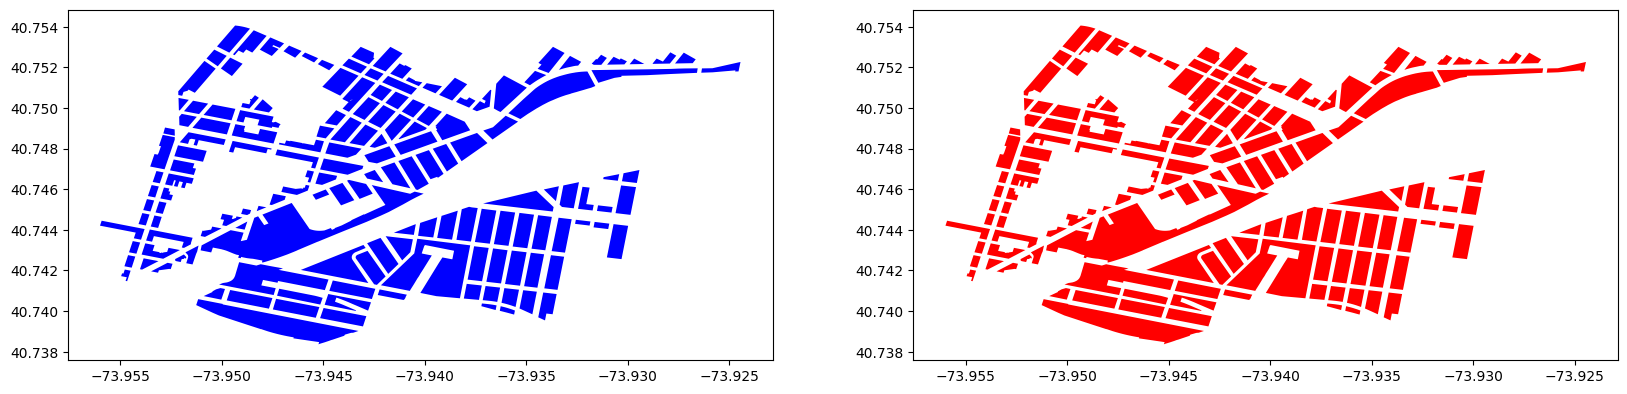

In [28]:
# plot the two datasets side by side
fig, ax = plt.subplots(1, 2,  figsize=(20, 10))

# plot the bid_data_objectid_2_0 geodataframe
lic_data.plot(ax=ax[0], color='blue', markersize=.01)
# plot the exploded geodataframe
exploded_lic_data.plot(ax=ax[1], color='red', markersize=.01)

plt.show()

In [29]:
# Get the bounding box of all exploded_lic_data geometry
bounding_box = exploded_lic_data.total_bounds

# Filter bench_data to include only trees within the bounding box
bench_within_bbox = bench_data.cx[bounding_box[0]:bounding_box[2], 
                                  bounding_box[1]:bounding_box[3]]

# Convert the filtered data to a GeoDataFrame
bench_within_bbox = gpd.GeoDataFrame(bench_within_bbox, geometry='the_geom')

# how many benches are within the bounding box
print("Number of benches within the bounding box: ", bench_within_bbox.shape[0])

Number of benches within the bounding box:  21


In [30]:
# Filter seats_data to include only trees within the bounding box
seats_within_bbox = seats_data.cx[bounding_box[0]:bounding_box[2], 
                                  bounding_box[1]:bounding_box[3]]

# Convert the filtered data to a GeoDataFrame
seats_within_bbox = gpd.GeoDataFrame(seats_within_bbox, geometry='geometry')

# how many seats are within the bounding box
print("Number of seats within the bounding box: ", seats_within_bbox.shape[0])

Number of seats within the bounding box:  15


In [31]:
# Filter plaza_data to include only trees within the bounding box
plaza_within_bbox = plaza_data.cx[bounding_box[0]:bounding_box[2], 
                                  bounding_box[1]:bounding_box[3]]

# Convert the filtered data to a GeoDataFrame
plaza_within_bbox = gpd.GeoDataFrame(plaza_within_bbox, geometry='the_geom')

# how many trees are within the bounding box
print("Number of plazas within the bounding box: ", plaza_within_bbox.shape[0])

Number of plazas within the bounding box:  2


In [32]:
# Filter parks_data to include only trees within the bounding box
parks_within_bbox = parks_data.cx[bounding_box[0]:bounding_box[2], 
                                  bounding_box[1]:bounding_box[3]]

# Convert the filtered data to a GeoDataFrame
parks_within_bbox = gpd.GeoDataFrame(parks_within_bbox, geometry='the_geom')

# how many trees are within the bounding box
print("Number of parks within the bounding box: ", parks_within_bbox.shape[0])

Number of parks within the bounding box:  22


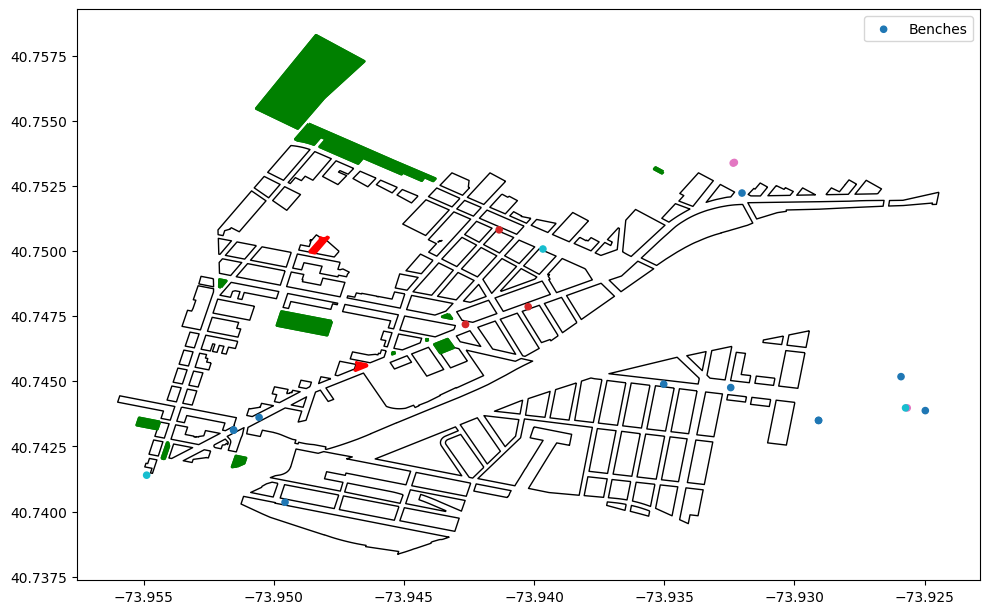

In [33]:
# Create a figure and axes with the desired size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot exploded_58 on the axes
exploded_lic_data.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

# Plot trees_within_bbox on the same axes
bench_within_bbox.plot(ax=ax, column='BenchType', markersize=20)
# seats_within_bbox.plot(ax=ax, column='Asset_Subtype', markersize=20, marker='x')
plaza_within_bbox.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=2)
parks_within_bbox.plot(ax=ax, edgecolor='green', facecolor='green', linewidth=2)

plt.legend(['Benches', 'Seats', 'Plaza'])
# Optionally, you can adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [34]:
# add a color column to trees_within_bbox that gives a unique hex color to each GenusSpecies
bench_within_bbox['color'] = bench_within_bbox['BenchType'].apply(
    lambda x: hash(x) % 16777215)

# print the first 5 rows of the trees_within_bbox dataframe
bench_within_bbox.head(1)

,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,SiteID,BenchID,...,ComDist,BusRoute,BID,Latitude,Longitude,FEMAFldz,FEMAFldT,HrcEvac,geometry,color
52,POINT (-73.92907 40.74350),4,Queens,402,26,37,12,14,1937,661,...,402,Not Applicable,Not Applicable,40.743509,-73.929076,X,AREA OF MINIMAL FLOOD HAZARD,,None,15459752


In [35]:
bench_within_bbox.columns

Index(['the_geom', 'BoroCode', 'BoroName', 'BoroCD', 'CounDist', 'AssemDist',
       'StSenDist', 'CongDist', 'SiteID', 'BenchID', 'Category', 'BenchType',
       'Installati', 'Address', 'GeocodeAdd', 'Street', 'CrossStree',
       'Borough', 'ComDist', 'BusRoute', 'BID', 'Latitude', 'Longitude',
       'FEMAFldz', 'FEMAFldT', 'HrcEvac', 'geometry', 'color'],
      dtype='object')

In [36]:
# convert BenchType to sitting capacity
bench_within_bbox['SeatingCapacity'] = 3

In [37]:
cols = ['BenchType', 'Category', 'the_geom', 'BID', 'color', 'SeatingCapacity']

In [38]:
# fix TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x121b2b880>' as a data type
# save bench_within_bbox as  a json file
bench_within_bbox[cols].to_file("bench_data.json", driver='GeoJSON')

In [39]:
# drop columns "geometry"
exploded_lic_data.drop(columns=['geometry'], inplace=True)

In [40]:
exploded_lic_data.to_file("exploded_lic_data.json", driver='GeoJSON')

In [41]:
# Print summary of features within the bounding box
print("Number of benches within the bounding box:", bench_within_bbox.shape[0])
print("Number of seats within the bounding box:", seats_within_bbox.shape[0])
print("Number of plazas within the bounding box:", plaza_within_bbox.shape[0])
print("Number of parks within the bounding box:", parks_within_bbox.shape[0])

Number of benches within the bounding box: 21
Number of seats within the bounding box: 15
Number of plazas within the bounding box: 2
Number of parks within the bounding box: 22


In [42]:
# Prepare bench data for export
bench_within_bbox['type'] = 'bench'
bench_within_bbox['color'] = bench_within_bbox['Category'].apply(
    lambda x: hash(str(x)) % 16777215 if pd.notna(x) else 13339741
)
bench_within_bbox['SeatingCapacity'] = 3

# Prepare plaza data for export
plaza_within_bbox['type'] = 'plaza'
plaza_within_bbox['color'] = plaza_within_bbox['Partner'].apply(
    lambda x: hash(str(x)) % 16777215 if pd.notna(x) else 5578642
)
# Calculate seating capacity for plazas based on area
plaza_within_bbox['area'] = plaza_within_bbox.geometry.area
# Assuming 1 person per 10 square meters for plazas
plaza_within_bbox['SeatingCapacity'] = (plaza_within_bbox['area'] / 10).astype(int)
# Ensure a minimum capacity
plaza_within_bbox['SeatingCapacity'] = plaza_within_bbox['SeatingCapacity'].apply(
    lambda x: max(x, 4)
)

# Prepare parks data for export
parks_within_bbox['type'] = 'park'
parks_within_bbox['color'] = parks_within_bbox['TYPECATEGORY'].apply(
    lambda x: hash(str(x)) % 16777215 if pd.notna(x) else 8453982
)
# Calculate seating capacity for parks based on area
parks_within_bbox['area'] = parks_within_bbox.geometry.area
# Assuming 1 person per 20 square meters for parks (less dense than plazas)
parks_within_bbox['SeatingCapacity'] = (parks_within_bbox['area'] / 20).astype(int)
# Ensure a minimum capacity: 4 people
parks_within_bbox['SeatingCapacity'] = parks_within_bbox['SeatingCapacity'].apply(
    lambda x: max(x, 4)
)

In [43]:
# Create a combined GeoJSON for all features
def create_combined_geojson():
    features = []
    
    # Add bench features
    bench_cols = ['BenchType', 'Category', 'BID', 'color', 'SeatingCapacity', 'type']
    for _, row in bench_within_bbox.iterrows():
        properties = {col: row[col] for col in bench_cols if col in row}
        feature = {
            "type": "Feature",
            "properties": properties,
            "geometry": mapping(row.the_geom)
        }
        features.append(feature)
    
    # Add plaza features
    plaza_cols = ['Plaza_Name', 'Partner', 'Program_Phase', 'color', 'SeatingCapacity', 'type', 'area']
    for _, row in plaza_within_bbox.iterrows():
        properties = {col: row[col] for col in plaza_cols if col in row}
        feature = {
            "type": "Feature",
            "properties": properties,
            "geometry": mapping(row.the_geom)
        }
        features.append(feature)
    
    # Add parks features
    parks_cols = ['TYPECATEGORY', 'ACRES', 'PARK_NAME', 'color', 'SeatingCapacity', 'type', 'area']
    for _, row in parks_within_bbox.iterrows():
        properties = {col: row[col] for col in parks_cols if col in row}
        feature = {
            "type": "Feature",
            "properties": properties,
            "geometry": mapping(row.the_geom)
        }
        features.append(feature)
    
    return {
        "type": "FeatureCollection",
        "features": features
    }



# Create the combined GeoJSON
combined_data = create_combined_geojson()

In [44]:
# Save the combined data to a GeoJSON file
with open("combined_facilities.json", "w") as f:
    json.dump(combined_data, f)

# Save the LIC BID boundary to a GeoJSON file
# drop columns "geometry"
# exploded_lic_data.drop(columns=['geometry'], inplace=True)
exploded_lic_data.to_file("lic_bid.json", driver='GeoJSON')

# Create a simple plot to visualize the data
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the LIC BID boundary
exploded_lic_data.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

# Plot benches
bench_within_bbox.plot(ax=ax, column='Category', legend=True, markersize=20, marker='o', 
                       cmap='Set1', legend_kwds={'title': 'Bench Category'})

# Plot plazas
plaza_within_bbox.plot(ax=ax, column='Partner', alpha=0.5, legend=True, 
                       cmap='Set2', legend_kwds={'title': 'Plaza Partner'})

# Plot parks
parks_within_bbox.plot(ax=ax, column='TYPECATEGORY', alpha=0.5, legend=True, 
                       cmap='Set3', legend_kwds={'title': 'Park Type'})

plt.title("Facilities in Long Island City BID")
plt.tight_layout()
plt.savefig("lic_facilities_map.png")
plt.close()

print("Processing complete!")
print("Files created: combined_facilities.json, lic_bid.json")
print("Map saved as: lic_facilities_map.png")

Processing complete!
Files created: combined_facilities.json, lic_bid.json
Map saved as: lic_facilities_map.png


In [50]:
combined_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'BenchType': 'backed',
    'Category': 'General',
    'BID': 'Not Applicable',
    'color': 6136647,
    'SeatingCapacity': 3,
    'type': 'bench'},
   'geometry': {'type': 'Point',
    'coordinates': (-73.92907457462115, 40.74350073458311)}},
  {'type': 'Feature',
   'properties': {'BenchType': 'backed',
    'Category': 'Municipal Facilities',
    'BID': 'Not Applicable',
    'color': 10832776,
    'SeatingCapacity': 3,
    'type': 'bench'},
   'geometry': {'type': 'Point',
    'coordinates': (-73.9324475733938, 40.744762734606475)}},
  {'type': 'Feature',
   'properties': {'BenchType': 'backed',
    'Category': 'General',
    'BID': 'Not Applicable',
    'color': 6136647,
    'SeatingCapacity': 3,
    'type': 'bench'},
   'geometry': {'type': 'Point',
    'coordinates': (-73.95153956730736, 40.74312873585459)}},
  {'type': 'Feature',
   'properties': {'BenchType': 'backed',
    'Category': 'Community He